## Text Modeling techniques:
In this notebook, I am going to use spacy, nltk and other libraries to explore different basic NLP modeling techniques. We will be training a bunch of small text classification methods. This is a good resource notebook for those who are starting with NLP and want to explore the techniques and simple methodologies.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataisbeautiful/r_dataisbeautiful_posts.csv
/kaggle/input/reddit-flair-dataset/reddit_data.csv


In [2]:
import spacy
import nltk
import re
from nltk.corpus import stopwords

In [3]:
text_data = pd.read_csv('/kaggle/input/dataisbeautiful/r_dataisbeautiful_posts.csv')
print("the data shape is:",text_data.shape)
text_data.head(5)

the data shape is: (193091, 12)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,it7yz2,[OC] The World’s Forests Mapped,1,vividmaps,NaN,NaN,0.0,[],1600173678,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
1,it7uig,[OC] Airbnb presence mapped in Barcelona (BCN)...,1,JonnieNeptune,OC: 2,NaN,0.0,[],1600173208,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,it7t4z,A marketplace for open streaming data sources,1,DangerMouse289,NaN,automod_filtered,0.0,[],1600173075,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,it7jfq,[OC] Black Owner-Occupied Housing,1,SocialExplorerInc,OC: 17,NaN,0.0,[],1600172010,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
4,it7a3r,[OC] My monthly average steps in 2020. Quarant...,1,ahmedgelemli,OC: 2,NaN,0.0,[],1600171002,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [4]:
cols = list(text_data.columns)

In [5]:
print(cols)

['id', 'title', 'score', 'author', 'author_flair_text', 'removed_by', 'total_awards_received', 'awarders', 'created_utc', 'full_link', 'num_comments', 'over_18']


## Basic information:
The data shape is 1,93,091,i.e. 193k rows are there. This is moderately big dataset.<br/>
So the reddit data has the following columns:<br/>
(1) **id**: this represents a unique id for each post.<br/>
(2) **title**: each reddit post contains a title, this is the title text.<br/>
(3) **score**: each reddit post can be upvoted or downvoted. And thereby receives a score. This is that score.<br/>
(4) **author**: this is basically user name.<br/>
(5) **author_flair_text**: Need to know exactly what does it represent. We will inspect the data first and check in other notebooks too.<br/>
(6) **removed_by**: this is removed by what option. i.e. if the post is eventually removed, who removed it. This is a very interesting source of data.<br/>
(7) **created_utc**: when was this post created in utc timing but it is in [unix epoch](https://www.utctime.net/) format. We need to transform it into normal date time to work on it. <br/>
(8) **full_link**: what is the full_link for the reddit post. This url will contain reddit's domain, subreddit and other informations. Need to parse the link to create subreddit and other different informations.<br/>
(9)**num_comments**: this is total number of comments which were seen in the post.<br/>
(10) **over_18**: this is basically the NSFW tag in reddit. Denotes whether the post contains something adult or not.<br/>

## First action: Build a NSFW classifier
In this section we are going to create different features and going to build a NSFW classifier.

In [6]:
re.sub('\[oc\]','','[oc]granny')

'granny'

In [7]:
text = text_data.drop(['id','author','author_flair_text',
                       'created_utc','awarders'],axis = 1)
text['over_18'] = text['over_18']*1
def replacer(x):
    return re.sub('\[OC\]','',x)
def replacer_fulllink(x):
    path_reduced = re.sub('https://www.reddit.com/r/','',x)
    path_reduced_list = path_reduced.split("/")
    return path_reduced_list[0]
text['title'] = text['title'].apply(lambda x: replacer(str(x)))
text['removed_by'] = text['removed_by'].fillna("")
text['subreddit'] = text['full_link'].apply(lambda x: replacer_fulllink(x))

In [8]:
text['subreddit'].value_counts()

dataisbeautiful    193091
Name: subreddit, dtype: int64

In [9]:
text.head()

,title,score,removed_by,total_awards_received,full_link,num_comments,over_18,subreddit
0,The World’s Forests Mapped,1,,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,1,0,dataisbeautiful
1,"Airbnb presence mapped in Barcelona (BCN), Sp...",1,,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,dataisbeautiful
2,A marketplace for open streaming data sources,1,automod_filtered,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,dataisbeautiful
3,Black Owner-Occupied Housing,1,,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,1,0,dataisbeautiful
4,My monthly average steps in 2020. Quarantine ...,1,,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,0,dataisbeautiful


In [10]:
text['over_18'].value_counts()

0    192094
1       997
Name: over_18, dtype: int64

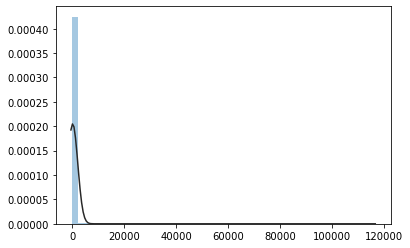

In [11]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(text['score'].tolist(),fit = norm, kde = False)

In [12]:
text['log_score'] = text['score'].apply(lambda x: np.log(x+1)/np.log(10))

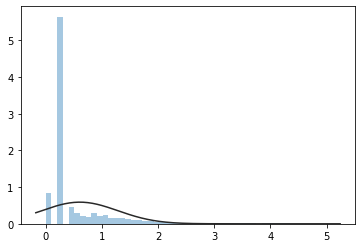

In [13]:
sns.distplot(text['log_score'].tolist(),fit = norm, kde = False)

In [14]:
print("value less than 3 is",text[text['log_score']<=3].shape)
print("value more than 3 is",text[text['log_score']>3].shape)

value less than 3 is (189409, 9)
value more than 3 is (3682, 9)


The data is extremely imbalanced. So we will have to keep that in mind.

In [15]:
text['removed_by'].value_counts()

                    177406
moderator            11036
deleted               2398
automod_filtered      1187
reddit                1063
author                   1
Name: removed_by, dtype: int64

In [16]:
for elem in ['moderator','deleted','automod_filtered',
             'reddit','author']:
    text['removed_by_'+elem] = text['removed_by'].apply(lambda x: (x==elem)*1.0)
text['Not_removed'] = text['removed_by'].apply(lambda x: (x=='')*1.0)

In [17]:
text = text.drop(['subreddit','full_link','removed_by'],axis = 1)

In [18]:
text.columns

Index(['title', 'score', 'total_awards_received', 'num_comments', 'over_18',
       'log_score', 'removed_by_moderator', 'removed_by_deleted',
       'removed_by_automod_filtered', 'removed_by_reddit', 'removed_by_author',
       'Not_removed'],
      dtype='object')

## Bag of word creation:
For NSFW posts, let's create a bag of words from the nsfw posts which are never present in non-nsfw posts. Then we will create features out of this.

In [19]:
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    if text:
        text = ' '.join(text.split('.'))
        text = re.sub('\/',' ',text)
        text = re.sub(r'\\',' ',text)
        text = re.sub(r'((http)\S+)','',text)
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', text.strip().lower())).strip()
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []

In [20]:
re.sub(r'\\',' ','aof\god')

'aof god'

In [21]:
text['title'] = text['title'].apply(lambda x: ' '.join(text_cleaning(x)))

In [22]:
nsfw_text = ''
sfw_text = ''
for elem in text['title'][text['over_18']==1].tolist():
    nsfw_text = nsfw_text+elem
for elem in text['title'][text['over_18']==0].tolist():
    sfw_text = sfw_text+elem

In [23]:
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [24]:
top_200_nsfw_words = return_top_words(nsfw_text,400)
top_200_sfw_words = return_top_words(sfw_text,400)
top_nsfw_exclusive = list(set(top_200_nsfw_words).difference(set(top_200_sfw_words)))
top_sfw_exclusive = list(set(top_200_sfw_words).difference(set(top_200_nsfw_words)))

In [25]:
total_vocab = top_nsfw_exclusive + top_sfw_exclusive
for word in total_vocab:
    text['Is_'+word+'_in_title'] = text['title'].apply(lambda x: (word in x)*1.0)

In [26]:
text = text.drop('title',axis = 1)

In [27]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
Y = text['over_18']
X = text.drop('over_18',axis = 1)
X_train,X_val,Y_train,Y_val = tts(X,Y,test_size = 0.2,stratify = Y,random_state = 42)

In [28]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest = RFC(n_estimators = 128,max_depth = 22,class_weight = {0:1,1:192},
            n_jobs = -1,random_state = 42)
forest.fit(X_train,Y_train)
pred_train = forest.predict(X_train)
pred_val = forest.predict(X_val)
print(classification_report(Y_train,pred_train))
print(classification_report(Y_val,pred_val))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    153674
           1       0.33      0.66      0.44       798

    accuracy                           0.99    154472
   macro avg       0.66      0.82      0.72    154472
weighted avg       0.99      0.99      0.99    154472

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     38420
           1       0.22      0.45      0.30       199

    accuracy                           0.99     38619
   macro avg       0.61      0.72      0.65     38619
weighted avg       0.99      0.99      0.99     38619



So clearly, around 33% F1-score can be reached with a random forest for nsfw detection. We could use a LSTM model for this too, but as clearly the problem is not semantical so LSTM is not a suitable thing here according to what I think. We will now move on to the next problem.

## Score prediction from this dataset
As we already saw, the score is a very highly left skewed number; clearly a poisson variable with inflation around 0. We will try to predict the scores, or atleast 0 and non-zero from title, award number and other variables in the dataset.

First things first, let's drop the useless columns. But wait, actually none of the features are not that insignificant. An author's name can have some implicit effect on scores. Also, link length, number of comments, total_awards_recieved, awarder list, whether it was removed or not, whether its NSFW or not every things will matter.<br/>
So we are dropping none other than id.

In [30]:
text_data = text_data.drop('id',axis = 1)

need to change the created_utc to see if there is any effect of time in score. This is unix epoch time, so will try something to decode it.

In [31]:
from datetime import datetime
ts = int("1284101485")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


2010-09-10 06:51:25


In [32]:
def time_unix_change(x):
    x = int(x)
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d  %H:%M:%S')

In [33]:
text_data['time'] = text_data['created_utc'].apply(lambda x: time_unix_change(x))

In [34]:
text_data.time.describe()

count                   193091
unique                       1
top       2010-09-10  06:51:25
freq                    193091
Name: time, dtype: object

In [35]:
text_data.head()

,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18,time
0,[OC] The World’s Forests Mapped,1,vividmaps,NaN,NaN,0.0,[],1600173678,https://www.reddit.com/r/dataisbeautiful/comme...,1,False,2010-09-10 06:51:25
1,[OC] Airbnb presence mapped in Barcelona (BCN)...,1,JonnieNeptune,OC: 2,NaN,0.0,[],1600173208,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2010-09-10 06:51:25
2,A marketplace for open streaming data sources,1,DangerMouse289,NaN,automod_filtered,0.0,[],1600173075,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2010-09-10 06:51:25
3,[OC] Black Owner-Occupied Housing,1,SocialExplorerInc,OC: 17,NaN,0.0,[],1600172010,https://www.reddit.com/r/dataisbeautiful/comme...,1,False,2010-09-10 06:51:25
4,[OC] My monthly average steps in 2020. Quarant...,1,ahmedgelemli,OC: 2,NaN,0.0,[],1600171002,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2010-09-10 06:51:25


In [36]:
text_data = text_data.drop(['author','full_link','created_utc'],axis = 1)
text_data['removed_by'] = text_data['removed_by'].fillna('')
text['over_18'] = text['over_18']*1
def replacer(x):
    return re.sub('\[OC\]','',x)
text_data['title'] = text_data['title'].apply(lambda x: replacer(str(x)))
text_data['num_title'] = text_data['title'].apply(lambda x: len(x))
text_data['over_18'] = text_data['over_18']*1.0

In [37]:
text_data['hr'] = text_data['time'].apply(lambda x: x[12:14])

In [38]:
text_data['author_flair_text'] = text_data['author_flair_text'].fillna('')
print(text_data['author_flair_text'].unique())

['' 'OC: 2' 'OC: 17' 'OC: 11' 'OC: 4' 'OC: 7' 'OC: 55' 'OC: 1' 'OC: 23'
 'OC: 3' 'OC: 6' 'Viz Researcher' 'OC: 35' 'OC: 13' 'OC: 8' 'OC: 5'
 'OC: 34' 'OC: 22' 'OC: 9' 'OC: 61' 'OC: 21' 'OC: 14' 'OC: 46' 'OC: 48'
 'OC: 20' 'OC: 143' 'OC: 24' 'OC: 33' 'OC: 19' 'Viz Practitioner' 'OC: 32'
 'OC: 93' 'OC: 15' 'OC: 10' 'OC: 77' 'OC: 37' 'OC: 70' 'OC: 31' 'OC: 30'
 'OC: 27' 'OC: 54' 'OC: 45' 'OC: 29' 'OC: 53' 'OC: 47' 'OC: 28' 'OC: 26'
 'OC: 52' 'OC: 16' 'OC: 25' 'OC: 42' 'OC: 142' 'OC: 60'
 'Randy Olson | Viz Practitioner' 'OC: 18' 'OC: 92' 'OC: 12' 'OC: 44'
 'OC: 141' 'OC: 43' 'OC: 36' 'OC: 140' 'OC: 91' 'OC: 51' 'OC: 50' 'OC: 59'
 'OC: 41' 'OC: 40' 'OC: 97' 'OC: 58' 'OC: 49' 'Robert Kosara | EagerEyes'
 'OC: 90' 'OC: 39' 'OC: 69' 'OC: 96' 'OC: 139' 'OC: 68' 'OC: 57' 'OC: 138'
 'OC: 248' 'OC: 38' 'OC: 89' 'OC: 137' 'OC: 82' 'OC: 81' 'OC: 88' 'OC: 56'
 'OC: 86' 'OC: 135' 'OC: 80' 'OC: 134' 'OC: 85'
 'Viz Practitioner | Overflow Data' 'OC: 79' 'Nathan Yau | FlowingData'
 'OC: 67' 'OC: 66' 'OC

In [39]:
def flair_cleaner(x):
    x =  re.sub('\[OC\]','',x)
    x = re.sub('OC','',x)
    x = re.sub('|','',x)
    x = re.sub('oc','',x)
    x = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', x.strip().lower())).strip()
    return x

In [40]:
text_data['author_flair_text'] = text_data['author_flair_text'].apply(lambda x: flair_cleaner(x))

In [41]:
text_data = text_data.drop(['awarders','time'],axis = 1)

In [42]:
text_data.head()

,title,score,author_flair_text,removed_by,total_awards_received,num_comments,over_18,num_title,hr
0,The World’s Forests Mapped,1,,,0.0,1,0.0,27,06
1,"Airbnb presence mapped in Barcelona (BCN), Sp...",1,,,0.0,0,0.0,104,06
2,A marketplace for open streaming data sources,1,,automod_filtered,0.0,0,0.0,45,06
3,Black Owner-Occupied Housing,1,,,0.0,1,0.0,29,06
4,My monthly average steps in 2020. Quarantine ...,1,,,0.0,0,0.0,62,06


In [43]:
text_data = text_data[~text_data['score'].isna()]

In [44]:
text_data['removed_by'].unique()

array(['', 'automod_filtered', 'moderator', 'reddit', 'deleted', 'author'],
      dtype=object)

In [45]:
text_data['Not_removed'] = text_data['removed_by'].apply(lambda x: (x == '')*1.0)
for elem in ['automod_filtered', 'moderator', 'reddit', 'deleted', 'author']:
    text_data['removed_by_'+elem] = text_data['removed_by'].apply(lambda x: (x == elem)*1.0)

In [46]:
text_data = text_data.drop('removed_by',axis = 1)

In [47]:
text_data.head()

,title,score,author_flair_text,total_awards_received,num_comments,over_18,num_title,hr,Not_removed,removed_by_automod_filtered,removed_by_moderator,removed_by_reddit,removed_by_deleted,removed_by_author
0,The World’s Forests Mapped,1,,0.0,1,0.0,27,06,1.0,0.0,0.0,0.0,0.0,0.0
1,"Airbnb presence mapped in Barcelona (BCN), Sp...",1,,0.0,0,0.0,104,06,1.0,0.0,0.0,0.0,0.0,0.0
2,A marketplace for open streaming data sources,1,,0.0,0,0.0,45,06,0.0,1.0,0.0,0.0,0.0,0.0
3,Black Owner-Occupied Housing,1,,0.0,1,0.0,29,06,1.0,0.0,0.0,0.0,0.0,0.0
4,My monthly average steps in 2020. Quarantine ...,1,,0.0,0,0.0,62,06,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
text_data['author_flair_text'].unique()

array(['', 'viz researcher', 'viz practitioner',
       'randy olson viz practitioner', 'robert kosara eagereyes',
       'viz practitioner overflow data', 'nathan yau flowingdata', 'thor',
       'max roser our world in data', 'mike bostk d js creator',
       'tiger queen', 'candy crusher', 'uses too many cups',
       'temporary mod helper', 'viz practitioner randy olson',
       'viz practitioner dipika kadaba',
       'mart n gonz lez and evan hen leigh', 'chris ingraham wapo',
       'tom gable wildlife biologist',
       'steven rich aaron williams and andrew ba tran',
       'mart n gonz lez and evan hen leigh ama guests', 'data',
       'steven bernard financial times', 'mona chalabi the guardian',
       'shirley wu', 'nadieh bremer', 'elijah meeks', 'andy kirk',
       'flair bot', 'viz practitioner nasa', 'david yanofsky quartz',
       'mona chalabi fivethirtyeight', 'john johnson edgeworth economics',
       'scott berinato harvard business review', 'viz reseacher',
     

words like researcher, statistics, practitioner, nasa, institute, economics, prof gives out a sense of trust because the sub reddit is data related. So let's create a feature for that.

In [49]:
def expertise(x):
    count = 0
    for el in ['researcher','statistics','practitioner','nasa','economics','prof']:
        if el in x: count = count + 1
    return count
text_data['author_flair_text'] = text_data['author_flair_text'].apply(lambda x: expertise(x))

In [50]:
text_data = text_data.drop('title',axis = 1)

Time is a cyclic feature, so let's transform it.

In [51]:
text_data['hour_sin'] = text_data['hr'].apply(lambda x : np.sin(2 * np.pi * float(x)/23.0))
text_data['hour_cos'] = text_data['hr'].apply(lambda x : np.cos(2 * np.pi * float(x)/23.0))

In [52]:
text_data = text_data.rename(columns = {'author_flair_text':'expertise_count_author'})

In [53]:
text_data = text_data.drop('hr',axis = 1)

In [54]:
text_data.head()

,score,expertise_count_author,total_awards_received,num_comments,over_18,num_title,Not_removed,removed_by_automod_filtered,removed_by_moderator,removed_by_reddit,removed_by_deleted,removed_by_author,hour_sin,hour_cos
0,1,0,0.0,1,0.0,27,1.0,0.0,0.0,0.0,0.0,0.0,0.997669,-0.068242
1,1,0,0.0,0,0.0,104,1.0,0.0,0.0,0.0,0.0,0.0,0.997669,-0.068242
2,1,0,0.0,0,0.0,45,0.0,1.0,0.0,0.0,0.0,0.0,0.997669,-0.068242
3,1,0,0.0,1,0.0,29,1.0,0.0,0.0,0.0,0.0,0.0,0.997669,-0.068242
4,1,0,0.0,0,0.0,62,1.0,0.0,0.0,0.0,0.0,0.0,0.997669,-0.068242


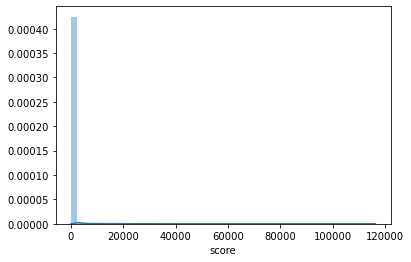

In [55]:
sns.distplot(text_data['score'])

In [56]:
text_data['score'].value_counts()

1       110370
0        16215
2         8968
3         5889
4         3994
         ...  
4175         1
1996         1
1868         1
7887         1
7997         1
Name: score, Length: 3996, dtype: int64

In [57]:
text_data[text_data['score']<100].shape

(183883, 14)

Looks like that 1 is a very dominant score; as that is the first score which gets assigned to most cases; and therefore we will first train a model for 1 vs not 1. 

In [58]:
text_data['score_class'] = text_data['score'].apply(lambda x: (x == 1)*1.0)

In [59]:
scores = text_data['score'].tolist()
text_data = text_data.drop('score',axis = 1)

In [60]:
Y = text_data['score_class']
X = text_data.drop('score_class',axis = 1)
X_train,X_val,Y_train,Y_val = tts(X,Y,test_size = 0.2,stratify = Y,random_state = 42)

In [61]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

In [62]:
Y_train.isna().sum()

0

In [63]:
forest = RFC(n_estimators = 128,max_depth = 22,class_weight = {0:1.33,1:1},
            n_jobs = -1,random_state = 42)
forest.fit(X_train,Y_train)
pred_train = forest.predict(X_train)
pred_val = forest.predict(X_val)
print(classification_report(Y_train,pred_train))
print(classification_report(Y_val,pred_val))

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67     66176
         1.0       0.75      0.77      0.76     88296

    accuracy                           0.72    154472
   macro avg       0.72      0.72      0.72    154472
weighted avg       0.72      0.72      0.72    154472

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65     16545
         1.0       0.74      0.75      0.75     22074

    accuracy                           0.71     38619
   macro avg       0.70      0.70      0.70     38619
weighted avg       0.70      0.71      0.71     38619

